# Recreating @dgleeson's implementation which can be found [here](https://public.tableau.com/profile/donovangleeson#!/vizhome/MakeoverMonday-Week30/OffensiveContribution).

In [2]:
import math
import numpy as np 
import pandas as pd
from PIL import Image

import matplotlib
import matplotlib.gridspec as gridspec
from matplotlib.backends.backend_pgf import FigureCanvasPgf
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)

from matplotlib import rc
rc('text',usetex=True)
rc('text.latex', preamble=r'\usepackage{xcolor}')
rc('pgf', preamble=r'\usepackage{xcolor}', rcfonts=False)

import matplotlib.pyplot as plt
import seaborn as sns

pd.options.mode.chained_assignment = None # surpress is copy warning

In [9]:
df = pd.read_csv('../Arsenal Player Stats 2018-19.csv')
df.head()

,Rank,Player,Nationality,Metric,Stat
0,1,Pierre-Emerick Aubameyang,Gabon,Appearances,36
1,2,Alex Iwobi,Nigeria,Appearances,35
2,2,Alexandre Lacazette,France,Appearances,35
3,4,Lucas Torreira,Uruguay,Appearances,34
4,5,Matteo Guendouzi,France,Appearances,33


In [38]:
pt = pd.pivot_table(df, values='Stat', index=['Player'], columns=['Metric'])
pt.reset_index(inplace=True)
print(pt.columns)
pt.head()

Index(['Player', 'Appearances', 'Assists', 'Big Chances Missed', 'Clearances',
       'Clearances Off Line', 'Dispossessed', 'Fouls', 'Goals', 'High Claim',
       'Hit Woodwork', 'Minutes Played', 'Offsides', 'Own Goal', 'Passes',
       'Punches', 'Red Cards', 'Saves', 'Shots', 'Tackles', 'Touches',
       'Yellow Cards'],
      dtype='object', name='Metric')


Metric,Player,Appearances,Assists,Big Chances Missed,Clearances,Clearances Off Line,Dispossessed,Fouls,Goals,High Claim,...,Offsides,Own Goal,Passes,Punches,Red Cards,Saves,Shots,Tackles,Touches,Yellow Cards
0,Aaron Ramsey,28,6,2,3,0,27,21,4,0,...,4,0,773,0,0,0,33,34,1029,0
1,Ainsley Maitland-Niles,16,1,0,11,1,17,8,1,0,...,1,0,451,0,1,0,5,33,782,1
2,Alex Iwobi,35,6,3,10,0,56,8,3,0,...,2,0,951,0,0,0,35,28,1415,0
3,Alexandre Lacazette,35,8,13,29,0,61,51,13,0,...,24,0,771,0,0,0,81,35,1313,2
4,Bernd Leno,32,0,0,32,0,1,0,0,10,...,0,0,922,16,0,105,0,0,1276,0


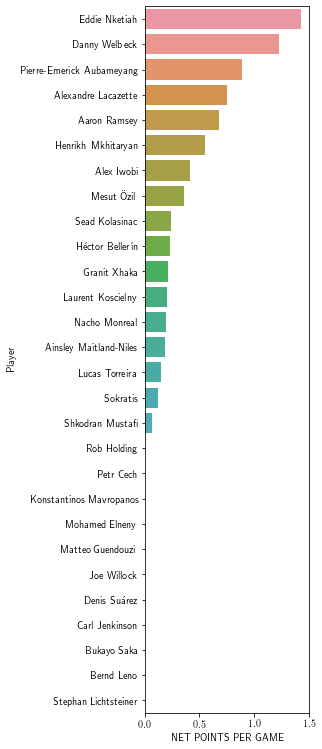

In [45]:
gs = gridspec.GridSpec(1, 3)
plt.figure(figsize=(10, 13))


ax = plt.subplot(gs[0, 0])
pt['NET POINTS PER GAME'] = (pt['Goals'] + pt['Assists'] - pt['Own Goal']) / (pt['Minutes Played'] / 90)
pt = pt.sort_values(by='NET POINTS PER GAME', ascending=False)
sns.barplot(ax=ax, x='NET POINTS PER GAME', y='Player', data=pt)